In [1]:
#uploading the csv file to google colab
from google.colab import files

uploaded = files.upload()

Saving Hotel Reservations.csv to Hotel Reservations.csv


In [2]:
#importing the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.preprocessing import StandardScaler 

In [3]:
df = pd.read_csv("/content/Hotel Reservations.csv")

In [4]:
#Canceled -> 0 and Not_Canceled -> 1

df['booking_status'].replace(['Canceled', 'Not_Canceled'],
                        [0, 1], inplace=True)

In [5]:
df.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,1
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,1
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,0
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,0
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,0


In [6]:
df.tail()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
36270,INN36271,3,0,2,6,Meal Plan 1,0,Room_Type 4,85,2018,8,3,Online,0,0,0,167.80,1,1
36271,INN36272,2,0,1,3,Meal Plan 1,0,Room_Type 1,228,2018,10,17,Online,0,0,0,90.95,2,0
36272,INN36273,2,0,2,6,Meal Plan 1,0,Room_Type 1,148,2018,7,1,Online,0,0,0,98.39,2,1
36273,INN36274,2,0,0,3,Not Selected,0,Room_Type 1,63,2018,4,21,Online,0,0,0,94.50,0,0
36274,INN36275,2,0,1,2,Meal Plan 1,0,Room_Type 1,207,2018,12,30,Offline,0,0,0,161.67,0,1


In [7]:
df.shape

(36275, 19)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

In [9]:
df.isnull().sum()

Booking_ID                              0
no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

In [10]:
df.duplicated().sum()

0

In [11]:
#checking for duplicate rows
df2 = df[df.duplicated(keep=False)]
print(df2)
#From the above query we can see that we do not have any duplicate data rows so we would not need to handle these data

Empty DataFrame
Columns: [Booking_ID, no_of_adults, no_of_children, no_of_weekend_nights, no_of_week_nights, type_of_meal_plan, required_car_parking_space, room_type_reserved, lead_time, arrival_year, arrival_month, arrival_date, market_segment_type, repeated_guest, no_of_previous_cancellations, no_of_previous_bookings_not_canceled, avg_price_per_room, no_of_special_requests, booking_status]
Index: []


In [12]:
df.columns

Index(['Booking_ID', 'no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests', 'booking_status'],
      dtype='object')

We are predicting the value of booking status.

In [13]:
df['booking_status'].value_counts()

1    24390
0    11885
Name: booking_status, dtype: int64

In [14]:
df.groupby('booking_status').describe()

no_of_adults                                               \
                      count      mean       std  min  25%  50%  75%  max   
booking_status                                                             
0                   11885.0  1.909550  0.486243  0.0  2.0  2.0  2.0  4.0   
1                   24390.0  1.813489  0.530993  0.0  2.0  2.0  2.0  4.0   

               no_of_children            ... avg_price_per_room         \
                        count      mean  ...                75%    max   
booking_status                           ...                             
0                     11885.0  0.124358  ...             126.36  540.0   
1                     24390.0  0.095982  ...             119.10  375.5   

               no_of_special_requests                                          \
                                count      mean       std  min  25%  50%  75%   
booking_status                                                                  
0                             11885.0  0.334623  0.574345  0.0  0.0  0.0  1.0   
1                             24390.0  0.758549  0.836532  0.0  0.0  1.0  1.0   

                     
                max  
booking_status       
0               2.0  
1               5.0  

[2 rows x 112 columns]

<ipython-input-15-2c7dde15f585>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corelation = df.corr()


<Axes: >

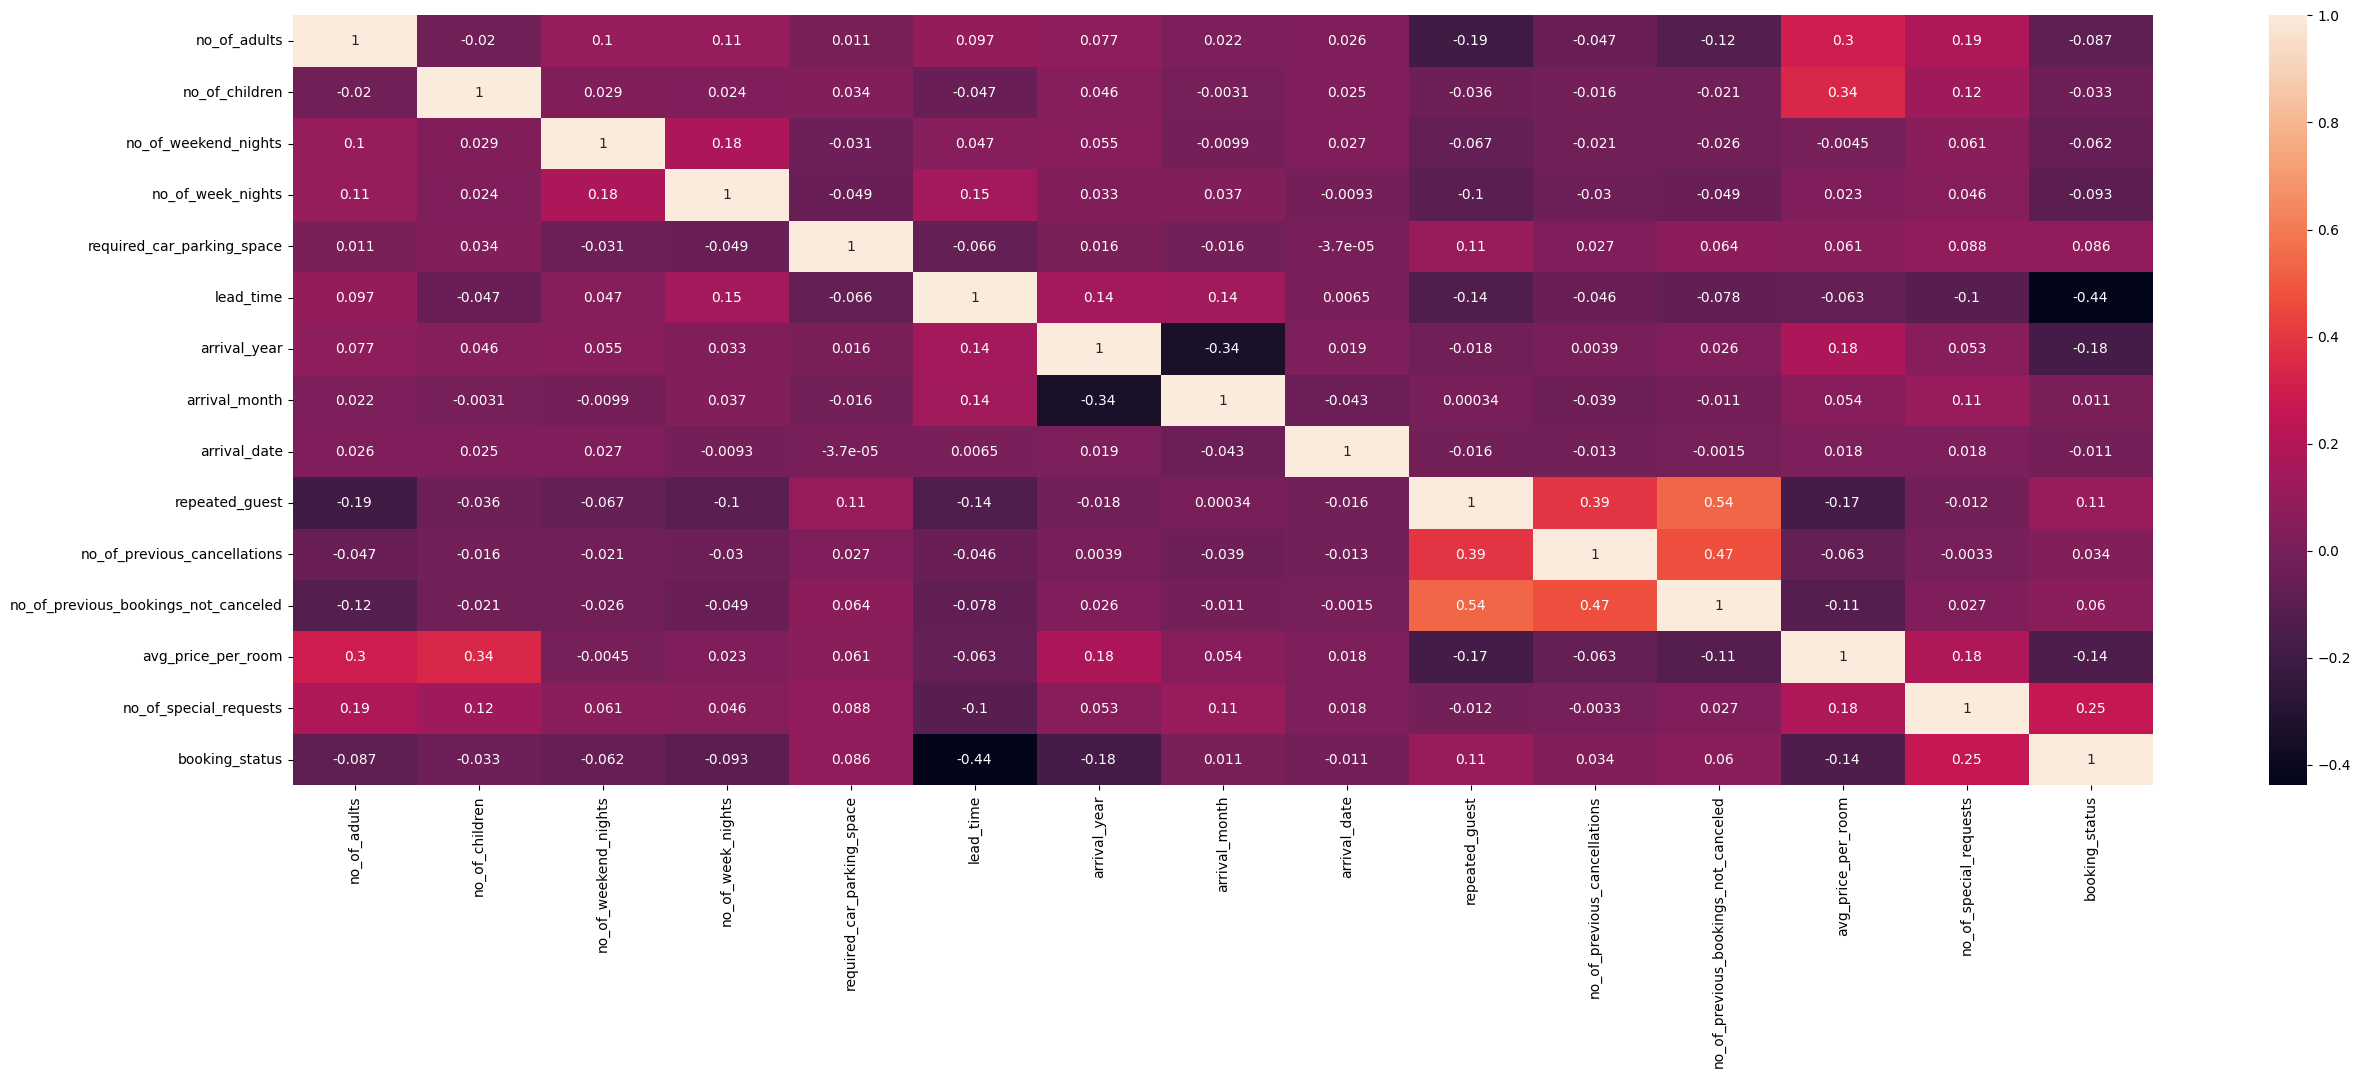

In [15]:
#using correlation to understand columns
fig, ax = plt.subplots(figsize=(30, 10))
corelation = df.corr()
sns.heatmap(corelation, xticklabels=corelation.columns, yticklabels=corelation.columns, annot=True)

In [16]:
#here we can drop multiple columns at once
X = df.drop(['booking_status','Booking_ID','room_type_reserved','type_of_meal_plan', 'market_segment_type'], axis=1)
Y = df['booking_status']

In [17]:
X = np.asarray(X).astype('float32')

In [18]:
print(X)

[[  2.     0.     1.   ...   0.    65.     0.  ]
 [  2.     0.     2.   ...   0.   106.68   1.  ]
 [  1.     0.     2.   ...   0.    60.     0.  ]
 ...
 [  2.     0.     2.   ...   0.    98.39   2.  ]
 [  2.     0.     0.   ...   0.    94.5    0.  ]
 [  2.     0.     1.   ...   0.   161.67   0.  ]]


In [19]:
print(Y)

0        1
1        1
2        0
3        0
4        0
        ..
36270    1
36271    0
36272    1
36273    0
36274    1
Name: booking_status, Length: 36275, dtype: int64


In [20]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.20, random_state=21)

In [21]:
!pip install lazypredict

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [22]:
from lazypredict.Supervised import LazyClassifier

clf = LazyClassifier(verbose=1, ignore_warnings=True, custom_metric=None)
models, predictions = clf.fit(X_train, X_test, Y_train, Y_test)

  3%|▎         | 1/29 [00:01<00:33,  1.19s/it]

{'Model': 'AdaBoostClassifier', 'Accuracy': 0.7990351481736734, 'Balanced Accuracy': 0.7517392877669861, 'ROC AUC': 0.7517392877669861, 'F1 Score': 0.7949965167438937, 'Time taken': 1.1858129501342773}


 10%|█         | 3/29 [00:02<00:20,  1.27it/s]

{'Model': 'BaggingClassifier', 'Accuracy': 0.8822880771881461, 'Balanced Accuracy': 0.8664539085248852, 'ROC AUC': 0.8664539085248852, 'F1 Score': 0.8824865296370541, 'Time taken': 1.4117016792297363}
{'Model': 'BernoulliNB', 'Accuracy': 0.7647139903514817, 'Balanced Accuracy': 0.7072255539602721, 'ROC AUC': 0.7072255539602721, 'F1 Score': 0.7583386817454415, 'Time taken': 0.13892626762390137}


 14%|█▍        | 4/29 [00:43<06:52, 16.50s/it]

{'Model': 'CalibratedClassifierCV', 'Accuracy': 0.7885596140592694, 'Balanced Accuracy': 0.726582356297439, 'ROC AUC': 0.726582356297439, 'F1 Score': 0.7802442999659422, 'Time taken': 40.570377588272095}


 28%|██▊       | 8/29 [00:43<01:33,  4.47s/it]

{'Model': 'DecisionTreeClassifier', 'Accuracy': 0.8594073053066851, 'Balanced Accuracy': 0.8426725669837111, 'ROC AUC': 0.8426725669837112, 'F1 Score': 0.859979209498151, 'Time taken': 0.17573904991149902}
{'Model': 'DummyClassifier', 'Accuracy': 0.6800827015851137, 'Balanced Accuracy': 0.5, 'ROC AUC': 0.5, 'F1 Score': 0.5505829928002217, 'Time taken': 0.03920626640319824}
{'Model': 'ExtraTreeClassifier', 'Accuracy': 0.8282563749138525, 'Balanced Accuracy': 0.8047108082614685, 'ROC AUC': 0.8047108082614683, 'F1 Score': 0.8286027889315668, 'Time taken': 0.06512641906738281}


 34%|███▍      | 10/29 [00:46<01:02,  3.30s/it]

{'Model': 'ExtraTreesClassifier', 'Accuracy': 0.8838042729152309, 'Balanced Accuracy': 0.8568444702297819, 'ROC AUC': 0.8568444702297819, 'F1 Score': 0.8825874393920963, 'Time taken': 2.7419164180755615}
{'Model': 'GaussianNB', 'Accuracy': 0.44011026878015164, 'Balanced Accuracy': 0.5826621005196208, 'ROC AUC': 0.5826621005196208, 'F1 Score': 0.3812211468457386, 'Time taken': 0.056957244873046875}


 38%|███▊      | 11/29 [00:50<01:03,  3.50s/it]

{'Model': 'KNeighborsClassifier', 'Accuracy': 0.8414886285320469, 'Balanced Accuracy': 0.8091912338080238, 'ROC AUC': 0.8091912338080238, 'F1 Score': 0.8400078671327841, 'Time taken': 4.242120981216431}


 41%|████▏     | 12/29 [01:27<03:13, 11.36s/it]

{'Model': 'LabelPropagation', 'Accuracy': 0.8328049620951068, 'Balanced Accuracy': 0.811933899729772, 'ROC AUC': 0.8119338997297721, 'F1 Score': 0.833458493905025, 'Time taken': 37.06540584564209}


 45%|████▍     | 13/29 [02:49<07:45, 29.07s/it]

{'Model': 'LabelSpreading', 'Accuracy': 0.833907649896623, 'Balanced Accuracy': 0.812744600986359, 'ROC AUC': 0.812744600986359, 'F1 Score': 0.834486043037777, 'Time taken': 82.0365834236145}


 48%|████▊     | 14/29 [02:50<05:22, 21.50s/it]

{'Model': 'LinearDiscriminantAnalysis', 'Accuracy': 0.7809786354238456, 'Balanced Accuracy': 0.7113114131961975, 'ROC AUC': 0.7113114131961975, 'F1 Score': 0.7699372403472144, 'Time taken': 0.32672715187072754}


 52%|█████▏    | 15/29 [02:59<04:14, 18.14s/it]

{'Model': 'LinearSVC', 'Accuracy': 0.7866299104066161, 'Balanced Accuracy': 0.7217410272293979, 'ROC AUC': 0.7217410272293979, 'F1 Score': 0.7773191024579227, 'Time taken': 9.227922439575195}


 55%|█████▌    | 16/29 [02:59<02:51, 13.17s/it]

{'Model': 'LogisticRegression', 'Accuracy': 0.7899379738111647, 'Balanced Accuracy': 0.7282802532419754, 'ROC AUC': 0.7282802532419754, 'F1 Score': 0.7817154588734522, 'Time taken': 0.4411628246307373}


 59%|█████▊    | 17/29 [03:00<01:53,  9.48s/it]

{'Model': 'NearestCentroid', 'Accuracy': 0.7539627842866988, 'Balanced Accuracy': 0.7468953826878432, 'ROC AUC': 0.7468953826878432, 'F1 Score': 0.7595045201235511, 'Time taken': 0.25810742378234863}


 69%|██████▉   | 20/29 [03:56<01:53, 12.64s/it]

{'Model': 'NuSVC', 'Accuracy': 0.8085458304617505, 'Balanced Accuracy': 0.7364846739564579, 'ROC AUC': 0.736484673956458, 'F1 Score': 0.7965867467161291, 'Time taken': 56.203885555267334}
{'Model': 'PassiveAggressiveClassifier', 'Accuracy': 0.6547208821502413, 'Balanced Accuracy': 0.6794084325854401, 'ROC AUC': 0.6794084325854401, 'F1 Score': 0.6662712929751777, 'Time taken': 0.0856478214263916}
{'Model': 'Perceptron', 'Accuracy': 0.6560992419021364, 'Balanced Accuracy': 0.6433436222418563, 'ROC AUC': 0.6433436222418562, 'F1 Score': 0.6653030331175769, 'Time taken': 0.10206294059753418}


 72%|███████▏  | 21/29 [03:56<01:16,  9.58s/it]

{'Model': 'QuadraticDiscriminantAnalysis', 'Accuracy': 0.450723638869745, 'Balanced Accuracy': 0.5904651001142701, 'ROC AUC': 0.59046510011427, 'F1 Score': 0.39751847592576706, 'Time taken': 0.12275552749633789}


 76%|███████▌  | 22/29 [03:59<00:55,  7.92s/it]

{'Model': 'RandomForestClassifier', 'Accuracy': 0.8945554789800138, 'Balanced Accuracy': 0.8662319349580774, 'ROC AUC': 0.8662319349580774, 'F1 Score': 0.8930748457194458, 'Time taken': 3.15289044380188}
{'Model': 'RidgeClassifier', 'Accuracy': 0.7826326671261199, 'Balanced Accuracy': 0.7085344295672285, 'ROC AUC': 0.7085344295672285, 'F1 Score': 0.7698145211190848, 'Time taken': 0.09314274787902832}


 86%|████████▌ | 25/29 [04:00<00:14,  3.57s/it]

{'Model': 'RidgeClassifierCV', 'Accuracy': 0.7827705031013095, 'Balanced Accuracy': 0.7086357672243018, 'ROC AUC': 0.7086357672243018, 'F1 Score': 0.76993705446124, 'Time taken': 0.13945817947387695}
{'Model': 'SGDClassifier', 'Accuracy': 0.7812543073742246, 'Balanced Accuracy': 0.7021589767350396, 'ROC AUC': 0.7021589767350396, 'F1 Score': 0.7663061988789455, 'Time taken': 0.18735194206237793}


 90%|████████▉ | 26/29 [04:37<00:36, 12.04s/it]

{'Model': 'SVC', 'Accuracy': 0.8286698828394211, 'Balanced Accuracy': 0.770560629084615, 'ROC AUC': 0.770560629084615, 'F1 Score': 0.821340238878304, 'Time taken': 37.4812126159668}


 97%|█████████▋| 28/29 [04:42<00:08,  8.00s/it]

{'Model': 'XGBClassifier', 'Accuracy': 0.8887663680220538, 'Balanced Accuracy': 0.860378539155456, 'ROC AUC': 0.8603785391554559, 'F1 Score': 0.8873131964518784, 'Time taken': 4.686347246170044}


100%|██████████| 29/29 [04:42<00:00,  9.75s/it]

{'Model': 'LGBMClassifier', 'Accuracy': 0.8734665747760165, 'Balanced Accuracy': 0.8366946057628949, 'ROC AUC': 0.8366946057628948, 'F1 Score': 0.8708275875372009, 'Time taken': 0.4642758369445801}


In [23]:
models

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
BaggingClassifier,0.88,0.87,0.87,0.88,1.41
RandomForestClassifier,0.89,0.87,0.87,0.89,3.15
XGBClassifier,0.89,0.86,0.86,0.89,4.69
ExtraTreesClassifier,0.88,0.86,0.86,0.88,2.74
DecisionTreeClassifier,0.86,0.84,0.84,0.86,0.18
LGBMClassifier,0.87,0.84,0.84,0.87,0.46
LabelSpreading,0.83,0.81,0.81,0.83,82.04
LabelPropagation,0.83,0.81,0.81,0.83,37.07
KNeighborsClassifier,0.84,0.81,0.81,0.84,4.24


In [24]:
#applying Standard Scaler

scaler = StandardScaler()

X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)


In [25]:
print(X.shape, X_train.shape, X_test.shape)

(36275, 14) (29020, 14) (7255, 14)


In [26]:
#importing tensorflow and keras
import tensorflow as tf
tf.random.set_seed(21)
from tensorflow import keras

In [27]:
# setting up layer for neural network
model = keras.Sequential([
                          keras.layers.Flatten(input_shape=(14,)), #input layer and here the 17 is the no of columns, take this data from the X.shape printed above #Flatten converts the data into a single dimensional array
                          keras.layers.Dense(50, activation = 'relu'), #hidden layer and dense means that the parameter is connected to all the nodes of the previous layer intially value is 10
                          keras.layers.Dense(50, activation = 'relu'),
                          keras.layers.Dense(50, activation = 'relu'),
                          keras.layers.Dense(2, activation ='sigmoid' ) #output layer
])

In [28]:

#compiling the Neural Network
model.compile(optimizer='adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

In [29]:
# training the neural network model

history = model.fit(X_train_std, Y_train, validation_split=0.15, epochs=20) #epoch initially 10

Epoch 1/20
771/771 [==============================] - 8s 7ms/step - loss: 0.4454 - accuracy: 0.7891 - val_loss: 0.4117 - val_accuracy: 0.8047
Epoch 2/20
771/771 [==============================] - 4s 5ms/step - loss: 0.4043 - accuracy: 0.8163 - val_loss: 0.3947 - val_accuracy: 0.8192
Epoch 3/20
771/771 [==============================] - 4s 5ms/step - loss: 0.3894 - accuracy: 0.8285 - val_loss: 0.3855 - val_accuracy: 0.8247
Epoch 4/20
771/771 [==============================] - 6s 8ms/step - loss: 0.3796 - accuracy: 0.8317 - val_loss: 0.3754 - val_accuracy: 0.8312
Epoch 5/20
771/771 [==============================] - 4s 5ms/step - loss: 0.3699 - accuracy: 0.8358 - val_loss: 0.3714 - val_accuracy: 0.8277
Epoch 6/20
771/771 [==============================] - 2s 2ms/step - loss: 0.3638 - accuracy: 0.8391 - val_loss: 0.3662 - val_accuracy: 0.8339
Epoch 7/20
771/771 [==============================] - 2s 2ms/step - loss: 0.3583 - accuracy: 0.8408 - val_loss: 0.3671 - val_accuracy: 0.8330
Epoch 

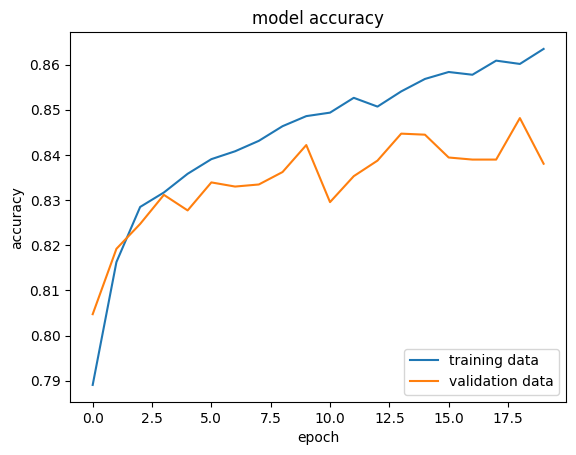

In [30]:
#Visualizing the loss and the accuracy

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')

plt.legend(['training data', 'validation data'], loc = 'lower right')

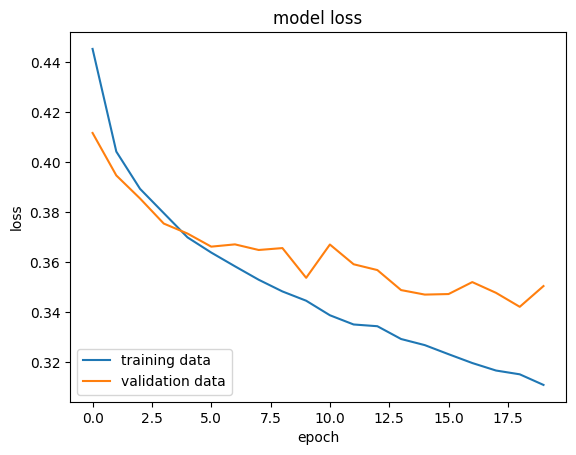

In [31]:
#Visualizing the loss and the accuracy

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')

plt.legend(['training data', 'validation data'], loc = 'lower left')

In [32]:
#Accuracy of the model on test data

loss, accuracy = model.evaluate(X_test_std, Y_test)
print(accuracy)

227/227 [==============================] - 0s 2ms/step - loss: 0.3478 - accuracy: 0.8507
0.8507236242294312


In [33]:
print(X_train_std.shape)
print(X_test_std[0])

(29020, 14)
[ 2.21879    -0.2603313   0.21854346  0.56037027 -0.17807911 -0.30644894
  0.46536806 -1.1153122  -1.3293189  -0.1627685  -0.06511609 -0.08848727
  0.04241225  0.49194354]


In [34]:
Y_pred = model.predict(X_test_std)

227/227 [==============================] - 0s 1ms/step


In [35]:
print(Y_pred.shape)
print(Y_pred[0])

(7255, 2)
[0.4113496 0.502118 ]


In [36]:
#converting the prediction probability to the class labels

Y_pred_labels = [np.argmax(i) for i in Y_pred]
print(Y_pred_labels)

[1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 

In [37]:
input_data = (2,0,1,2,0,224,2017,10,2,0,0,0,65,0)

#change input data to numpy array
input_data_as_numpy_array = np.asanyarray(input_data)

#reshape the numpy array as we are predicting for one data point
input_data_reshaped = input_data_as_numpy_array.reshape(1, -1)

#standardizing the input data
input_data_std = scaler.transform(input_data_reshaped)

prediction = model.predict(input_data_std)
print(prediction)

prediction_label = [np.argmax(prediction)]
print(prediction_label)

if (prediction_label[0] == 0):
  print('The Reservation is Cancelled')
else:
  print('The reservation is Not Cancelled')

1/1 [==============================] - 0s 23ms/step
[[0.16647893 0.46596897]]
[1]
The reservation is Not Cancelled
